<a href="https://colab.research.google.com/github/Sarath-Mohan9469545/tsa/blob/main/tsa_acf_differencing_n01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
series=pd.read_csv("/content/international-airline-passengers.csv",index_col="Month")
series

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0
...,...
1960-09,508.0
1960-10,461.0
1960-11,390.0


In [17]:
series= series.iloc[:-1 , :]
series

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0
...,...
1960-08,606.0
1960-09,508.0
1960-10,461.0


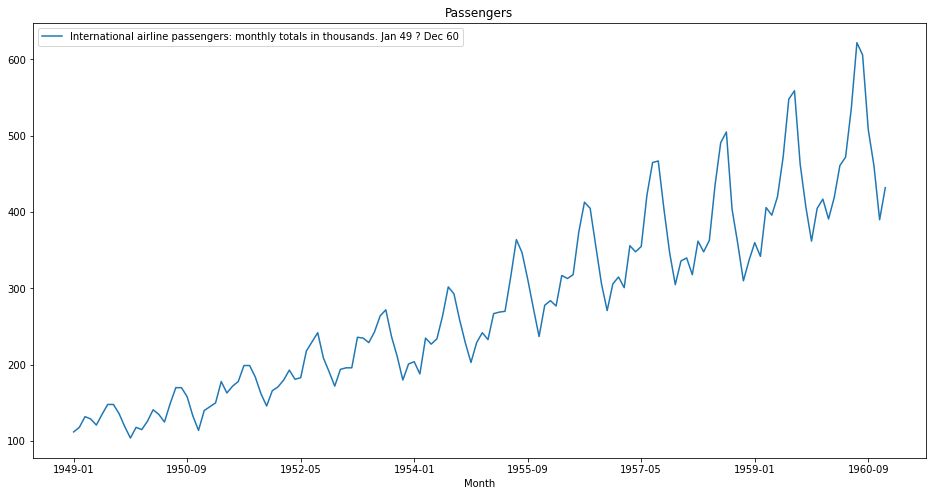

In [18]:
import matplotlib.pyplot as plt
series.plot(figsize=(16,8))
plt.title("Passengers")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd82b167dd0>]],
      dtype=object)

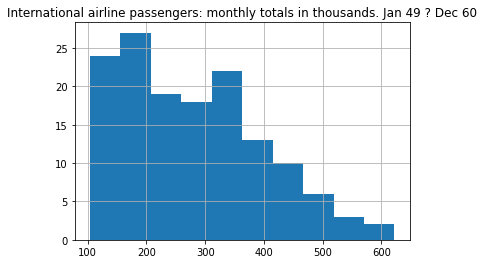

In [19]:
series.hist()

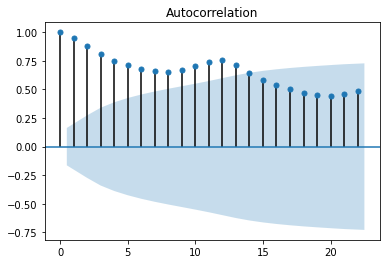

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(series)
plt.show()

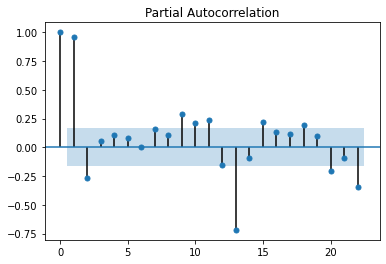

In [21]:
plot_pacf(series)
plt.show()

In [22]:
y=series.values
split=round(len(y)/2)
x1,x2=y[0:split],y[split:]
mean1,mean2=x1.mean(),x2.mean()
var1,var2=x1.var(),x2.var()
print("Mean13=",mean1,"Mean23=",mean2,"Variance13=",var1,"Variance23=",var2)

Mean13= 182.90277777777777 Mean23= 377.69444444444446 Variance13= 2244.0877700617284 Variance23= 7367.962191358024


In [24]:
from statsmodels.tsa.stattools import adfuller
x=pd.read_csv("/content/international-airline-passengers.csv",index_col="Month",squeeze=True).values
result=adfuller(x)
print(result)

(nan, nan, 0, 144, {'1%': -3.476597917537401, '5%': -2.8818291230495543, '10%': -2.5775887982253085}, nan)


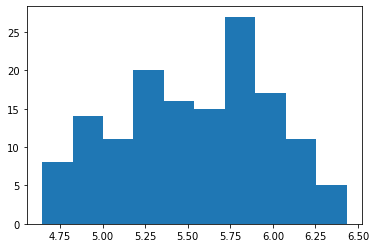

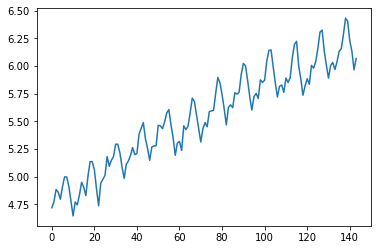

In [25]:
from numpy import log
logx=log(x)
plt.hist(logx)
plt.show()
plt.plot(logx)
plt.show()

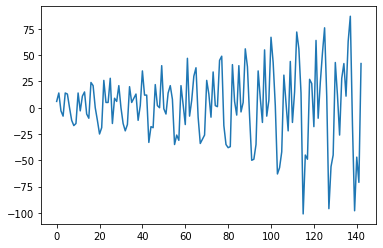

In [26]:
from pandas import Series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
diff = difference(x)
plt.plot(diff)
plt.show()

In [28]:
print(diff)

0       6.0
1      14.0
2      -3.0
3      -8.0
4      14.0
       ... 
139   -98.0
140   -47.0
141   -71.0
142    42.0
143     NaN
Length: 144, dtype: float64


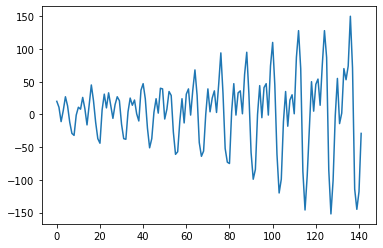

In [29]:
from pandas._libs.algos import diff_2d
def difference2(dataset, interval=2):
	diff2 = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff2.append(value)
	return Series(diff2)
diff2 = difference2(x)
plt.plot(diff2)
plt.show()

In [30]:
print(diff2)

0       20.0
1       11.0
2      -11.0
3        6.0
4       27.0
       ...  
138   -114.0
139   -145.0
140   -118.0
141    -29.0
142      NaN
Length: 143, dtype: float64


In [31]:
y=diff
split=round(len(y)/2)
x13,x23=y[0:split],y[split:]
mean13,mean23=x13.mean(),x23.mean()
var13,var23=x13.var(),x23.var()
print("Mean13=",mean13,"Mean23=",mean23,"Variance13=",var13,"Variance23=",var23)

Mean13= 1.8055555555555556 Mean23= 2.676056338028169 Variance13= 366.3841940532081 Variance23= 1939.2507042253524


In [32]:
y=diff2
split=round(len(y)/2)
x13,x23=y[0:split],y[split:]
mean13,mean23=x13.mean(),x23.mean()
var13,var23=x13.var(),x23.var()
print("Mean13=",mean13,"Mean23=",mean23,"Variance13=",var13,"Variance23=",var23)

Mean13= 3.4027777777777777 Mean23= 4.957142857142857 Variance13= 862.7228090766824 Variance23= 5197.461904761906


In [33]:
result=adfuller(diff)
print(result)

(nan, nan, 0, 143, {'1%': -3.4769274060112707, '5%': -2.8819726324025625, '10%': -2.577665408088415}, nan)


In [34]:
result=adfuller(diff2)
print(result)

(nan, nan, 0, 142, {'1%': -3.477261624048995, '5%': -2.8821181874544233, '10%': -2.5777431104939494}, nan)


In [35]:
import numpy as np
series['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'] = np.sqrt(series['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
series

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Month,
1949-01,10.583005
1949-02,10.862780
1949-03,11.489125
1949-04,11.357817
1949-05,11.000000
...,...
1960-08,24.617067
1960-09,22.538855
1960-10,21.470911


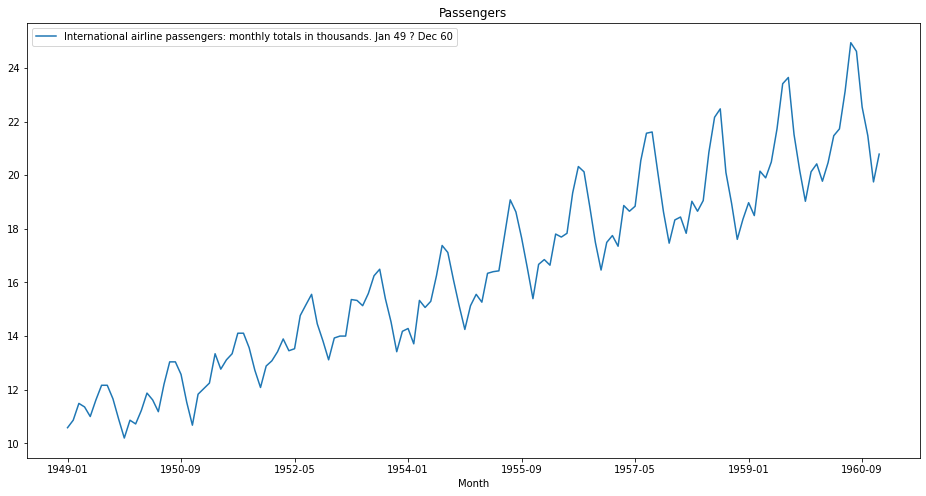

In [37]:
import matplotlib.pyplot as plt
series.plot(figsize=(16,8))
plt.title("Passengers")
plt.show()

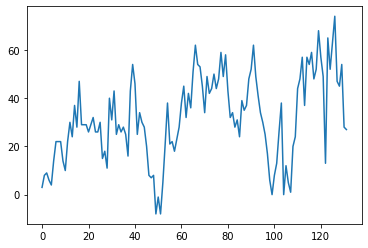

In [38]:
def difference(dataset, interval=12):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
diff = difference(x)
plt.plot(diff)
plt.show()

In [39]:
y=diff
split=round(len(y)/2)
x13,x23=y[0:split],y[split:]
mean13,mean23=x13.mean(),x23.mean()
var13,var23=x13.var(),x23.var()
print("Mean13=",mean13,"Mean23=",mean23,"Variance13=",var13,"Variance23=",var23)

Mean13= 24.106060606060606 Mean23= 39.43939393939394 Variance13= 184.61934731934736 Variance23= 324.188578088578
